### Import functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

### Generate traing data and target

In [2]:
# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2)#, random_state=6)

# target data
x3 = np.random.rand()* (max(X[:,0]) - min(X[:,0])) + min(X[:,0])
y3 = np.random.rand()* (max(X[:,1]) - min(X[:,1])) + min(X[:,1])
X_target = [[x3, y3]]

### Train the SVM model
Fit the model, don't regularize for illustration purposes. You can use 'rbf' kernel alternately

In [3]:
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y);

### Make a prediction 

In [4]:
p = clf.predict(X_target)

### Plot results 

Distance from hyperplane: 0.219622700880993


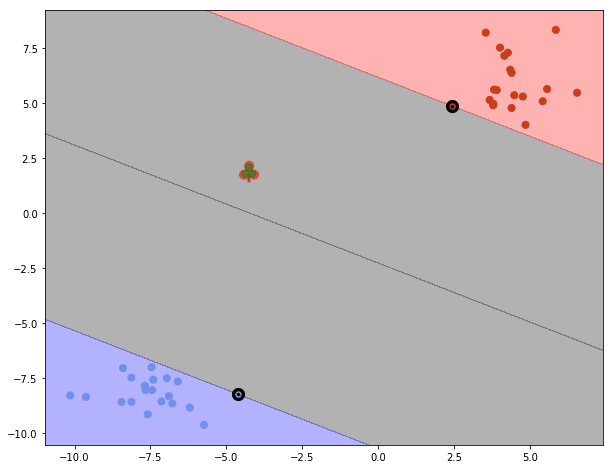

In [6]:
plt.subplots(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T # x and y in columns
Z = clf.decision_function(xy).reshape(XX.shape) # distance contour

# plot decision boundary and margins
plt.contourf(XX, YY, Z, colors=('b', 'k', 'k','r'), levels=[-100, -1, 0, 1, 100], alpha=0.3,
           linestyles=['--', '-', '--'])

# plot support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=10,
           linewidth=10, facecolors='k')

plt.scatter(x3, y3, s=500, c='r', alpha=0.5, marker=r'$\clubsuit$');
plt.scatter(x3, y3, s=300, c='g' if p else 'b', alpha=0.5, marker=r'$\clubsuit$');

print("Distance from hyperplane:", clf.decision_function(X_target)[0]);